
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [1]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


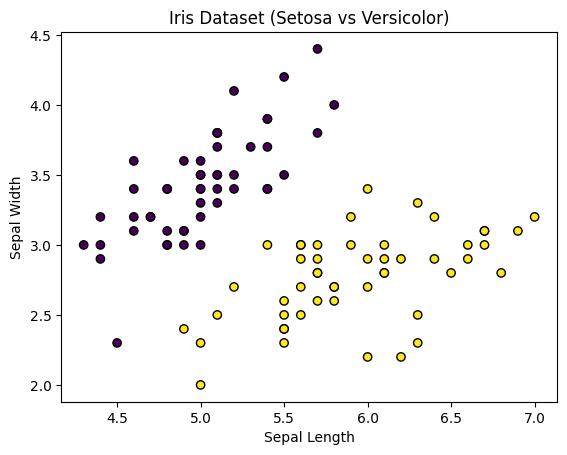

In [2]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform='pandas')
scaler

MinMaxScaler()

In [11]:
X_train_transform = scaler.fit_transform(X_train)
X_train_transform

,x0,x1
0,0.518519,1.000000
1,0.962963,0.458333
2,0.259259,0.000000
3,0.481481,0.416667
4,0.703704,0.083333
...,...,...
75,0.296296,0.625000
76,0.444444,0.625000
77,0.629630,0.583333
78,0.296296,0.708333


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [69]:
knn.fit(X_train_transform,y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
knn.score(X_train_transform,y_train)

1.0

In [71]:
X_test_transform = scaler.transform(X_test)
X_test_transform

,x0,x1
0,0.222222,0.166667
1,0.888889,0.416667
2,0.666667,0.375000
3,0.777778,0.500000
4,0.259259,0.583333
5,0.555556,0.833333
6,0.407407,0.583333
7,0.851852,0.416667
8,0.518519,0.750000
9,0.111111,0.666667


In [72]:
y_pred = knn.predict(X_test_transform)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, y_pred)

1.0


## Task 4: Predictions for Different Values of k


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn

KNeighborsClassifier(n_neighbors=2)

In [42]:
knn.fit(X_train_transform,y_train)
knn.score(X_train_transform,y_train)

1.0

In [43]:
y_pred = knn.predict(X_test_transform)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [44]:
accuracy_score(y_test, y_pred)

0.95

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [46]:
knn.fit(X_train_transform,y_train)
knn.score(X_train_transform,y_train)

0.9875

In [47]:
y_pred = knn.predict(X_test_transform)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [48]:
accuracy_score(y_test, y_pred)

1.0


## Task 5: Decision Boundary Function (Provided)


In [49]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


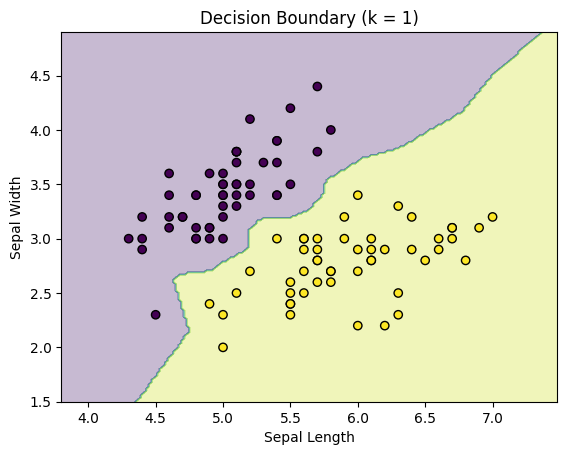

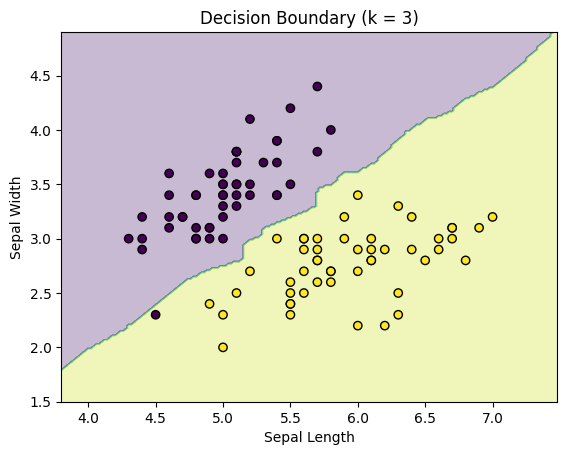

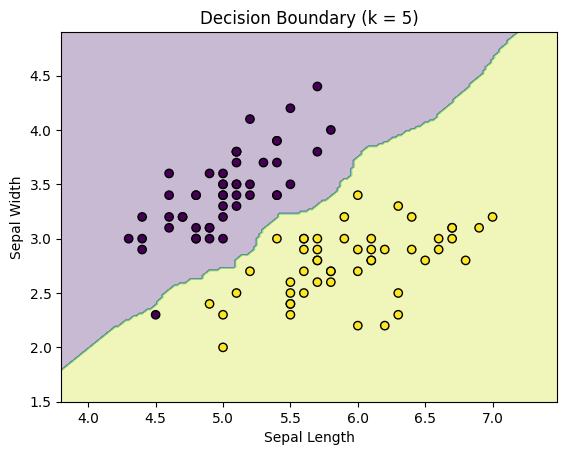

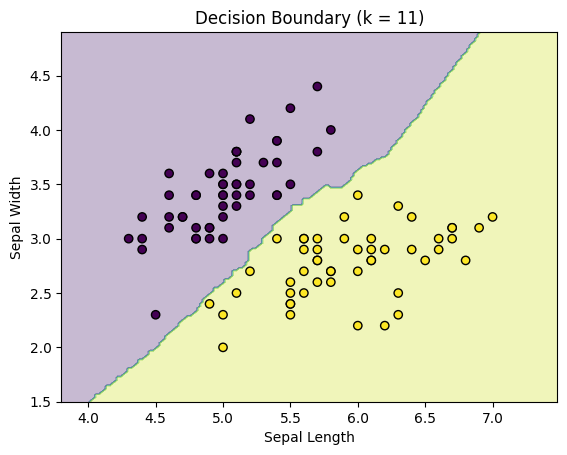

In [50]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [ ]:
Plot a decision boundary when using k=5 and change the distance

In [75]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


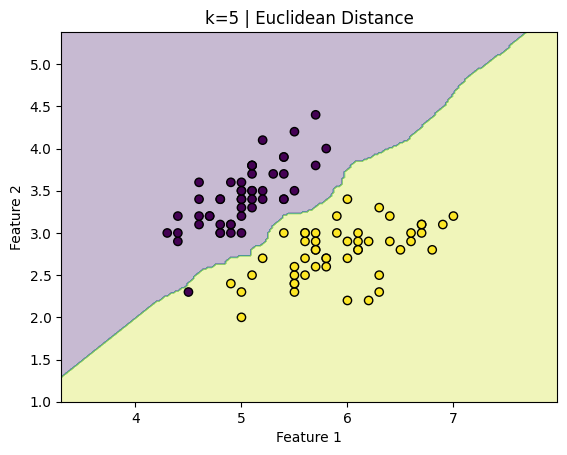

In [52]:
knn_euclidean = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn_euclidean.fit(X, y)

plot_decision_boundary(
    knn_euclidean, X, y,
    "k=5 | Euclidean Distance"
)


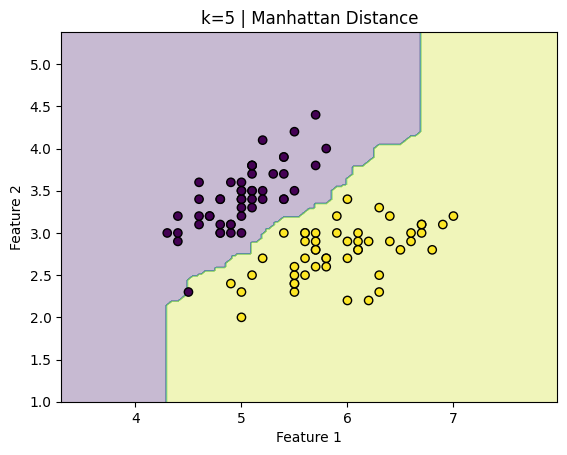

In [53]:
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric='manhattan'
)

knn_manhattan.fit(X, y)

plot_decision_boundary(
    knn_manhattan, X, y,
    "k=5 | Manhattan Distance"
)



## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


1.As k increases, the model's predictions become more stable and less sensitive to individual "noisy" data points. The decision boundary transitions from being highly jagged and specific to the training data to being smoother and more generalized

2.A value of k = 1 gives the most complex and irregular decision boundary. At this level, the model perfectly fits every point in the training set (zero training error), creating "islands" of classifications around individual data points.

3.k = 1 is unique because the model only considers the single closest neighbor to make a prediction. This makes the model highly susceptible to overfitting, as it captures every bit of noise or outlier in the training data rather than finding the underlying trend.

4.The distance metric changes the shape of the decision boundaries. Euclidean distance results in more rounded, circular boundaries, whereas Manhattan distance tends to create more grid-like, "boxy" boundaries because it calculates distance based on absolute differences along the axes.

5.A moderate value of k like k=5 or k= 10 is generally preferred. This configuration balances the bias-variance tradeoff. it is complex enough to capture the pattern of the Iris data but smooth enough to ignore noise, leading to better accuracy on new, unseen test data.